In [1]:
import torch
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker
from torch.nn.parameter import Parameter

import numpy as np
import time
from pyDOE import lhs         #Latin Hypercube Sampling
import scipy.io

from smt.sampling_methods import LHS
from scipy.io import savemat

#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(1234)

# Random number generators in other libraries
np.random.seed(1234)

device = torch.device('cpu')

print(device)

if device == 'cuda': 
    print(torch.cuda.get_device_name())

cpu


In [2]:
# Domain bounds
def plot_1D(prob_folder,num_steps,ax_loss,i):
    
    if i==0:
        prob_name= 'ES_'
    elif i==1:
        prob_name= '3D_HTTP_'
    else:
        prob_name= 'inv_HT_'
    
    activs = ["stan","tanh","atanh","swish","rowdy"]
    files = ["stan","tanh","atanh","swish","rowdy"]
    linetypes = ['r','k','b--','g:','c-.']
    labels = ['Stan (Proposed)','tanh','N-LAAF','Swish','Rowdy']
    
    
    
    for t in range(5):
        data = scipy.io.loadmat(prob_folder + activs[t] + '/' + prob_name + files[t] + '.mat')
        train_loss = data['train_loss']
        mean_train_loss = np.zeros((num_steps,1))
        
        for q in range(10):
            mean_train_loss= mean_train_loss + train_loss[i][:num_steps].reshape(-1,1)
       
        mean_train_loss = mean_train_loss/10
        
        if t==1:
            ax_loss.plot(mean_train_loss,linetypes[t],linewidth = 2,label = labels[t],linestyle = (0, (3, 1, 1, 1)))
        else:
            ax_loss.plot(mean_train_loss,linetypes[t],linewidth = 2,label = labels[t])


    ax_loss.set_xlabel('Epochs',fontsize=14,alpha = 1)
    ax_loss.set_ylabel('Loss',fontsize=14,alpha = 1)
    ax_loss.tick_params(axis='x', labelsize=8)
    ax_loss.tick_params(axis='y', labelsize=8)
    
    ax_loss.set_xlim([0,num_steps])

    return ax_loss


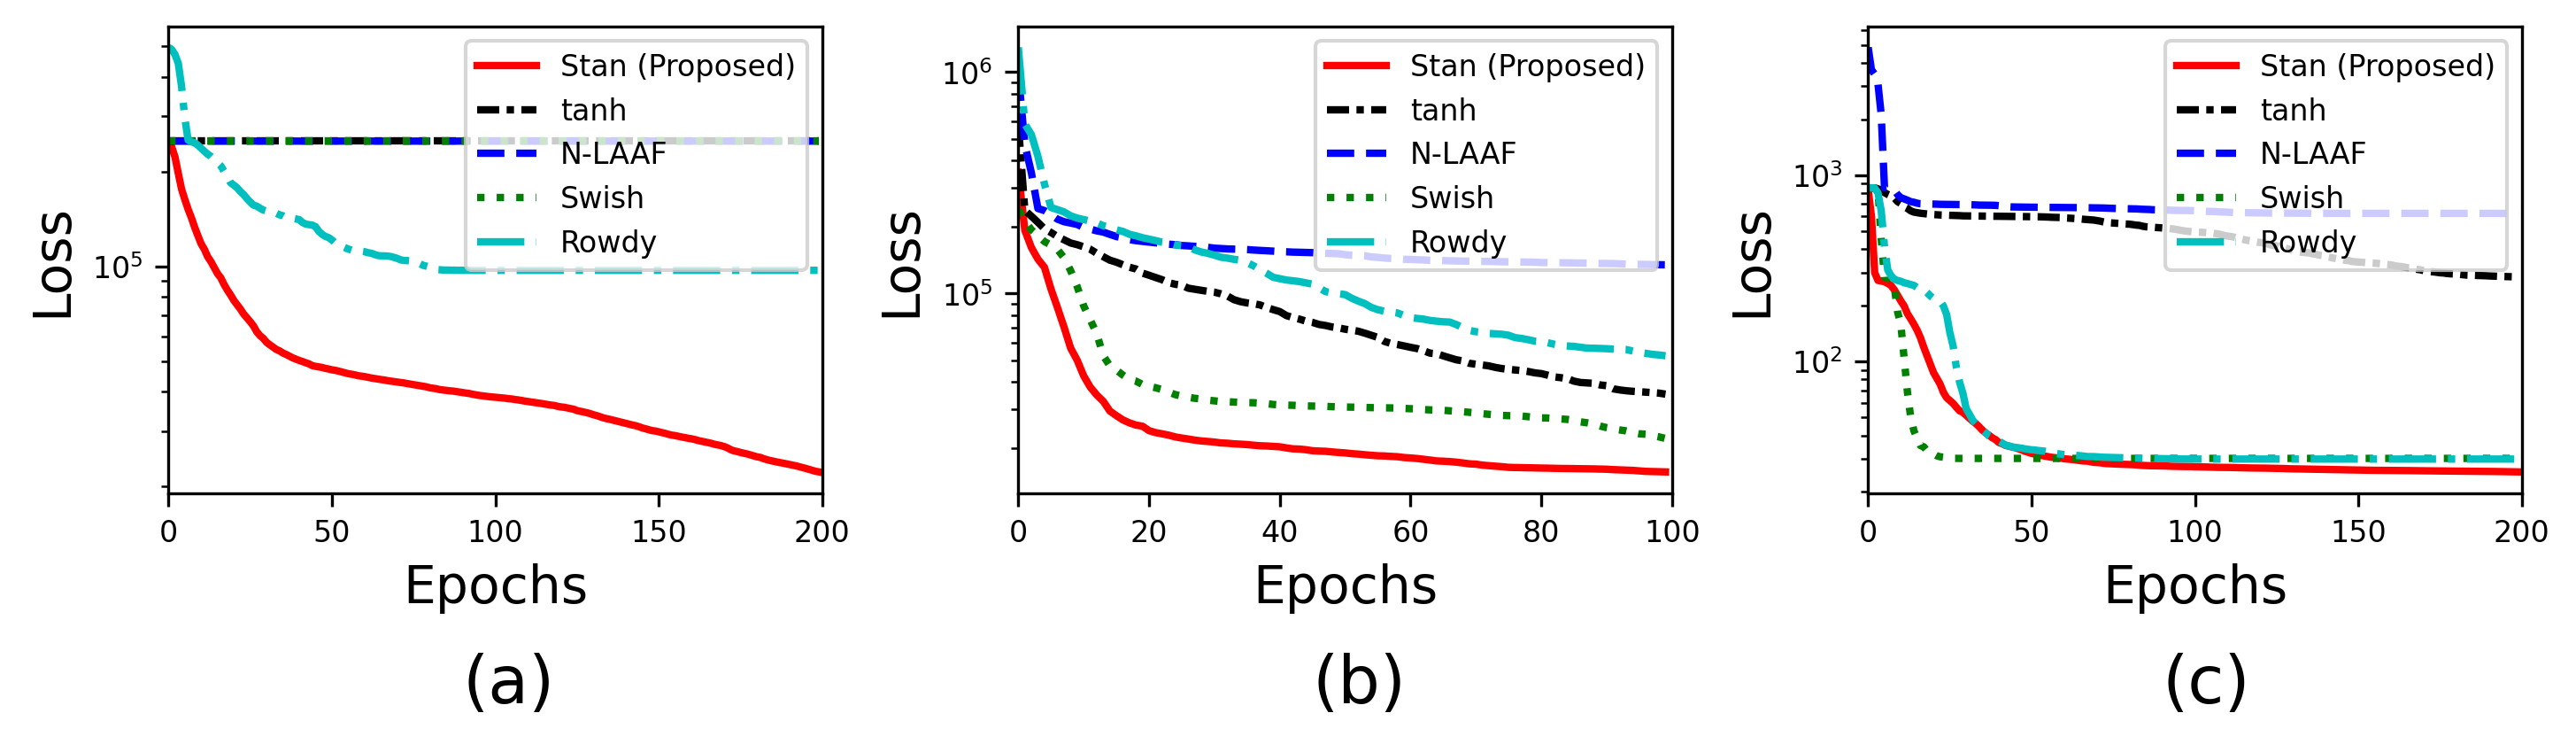

In [3]:
fig, ax = plt.subplots(1,3)
fig.dpi=300
fig.tight_layout()

prob_folders = ['./2D/Maxwell/','./3D/','./Inverse/HT/']

num_steps = [200,100,200]

# ax[0,1].set_yscale('log')
# ax[0,3].set_yscale('log')

for i in range(3):
    
  
    ax[i].figure.set_size_inches(10,2)

    ax[i]= plot_1D(prob_folders[i],num_steps[i],ax[i],i)
    ax[i].legend(prop={'size':8}, loc = 'upper right')
    
    ax[i].set_yscale('log')
    
    #ax[i].set_title('Training loss',fontsize=18)
    
#     ax[i].text(0.5,-0.25,,fontsize=18,transform=ax[i,0].transAxes)
    
# ax[0,0].set_title('Smooth Function',fontsize=18, math_fontfamily='cm')
# ax[0,1].set_title('Discontinuous Function',fontsize=18, math_fontfamily='cm')
# ax[0,2].set_title('First-order ODE',fontsize=18, math_fontfamily='cm')
# ax[0,3].set_title('Second-order ODE',fontsize=18, math_fontfamily='cm')

plot_rows = ['(a)','(b)','(c)']

for i in range(3):
    ax[i].text(0.45,-0.45,plot_rows[i],fontsize=18,transform=ax[i].transAxes)


fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace =0.3, hspace=None)
plt.savefig('Cases_Loss.pdf', format='pdf',pad_inches=0, bbox_inches='tight')
    

0.956196
-0.5215562
0.059420127
0.021943368
0.93495005


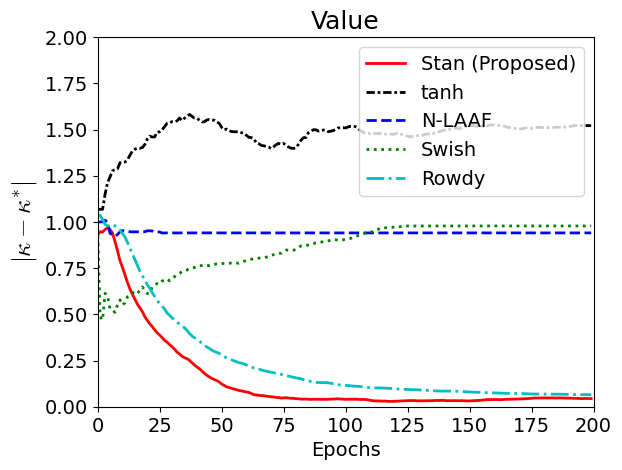

In [4]:
prob_folder = './Inverse/HT/'
prob_name= 'inv_HT_'

activs = ["stan","tanh","atanh","swish","rowdy"]
files = ["stan","tanh","atanh","swish","rowdy"]
linetypes = ['r','k','b--','g:','c-.']
labels = ['Stan (Proposed)','tanh','N-LAAF','Swish','Rowdy']

actual_lambda = 1

fig, ax = plt.subplots()

for t in range(5):
    data = scipy.io.loadmat(prob_folder + activs[t] + '/' + prob_name + files[t] + '.mat')
    lambda1=  data['lambda1']
    lambda1 = np.mean(lambda1,axis=0)
    print(lambda1[-1])
    
    if t==1:
        ax.plot(np.abs(lambda1 - actual_lambda),linetypes[t],linewidth = 2,label = labels[t],linestyle = (0, (3, 1, 1, 1)))
    else:
        ax.plot(np.abs(lambda1 - actual_lambda),linetypes[t],linewidth = 2,label = labels[t])
            

ax.set_xlim([0,200])
ax.set_ylim([0,2])
ax.legend(prop={'size':14})
ax.set_title('Value', fontsize=18, math_fontfamily='cm')
ax.set_xlabel('Epochs', fontsize=14, math_fontfamily='cm')
ax.set_ylabel('$|\\kappa - \\kappa^{*}|$',fontsize=18, math_fontfamily='cm')
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
#plt.savefig('Inv_HT_lambda_history.pdf', format='pdf',pad_inches=0, bbox_inches='tight')
plt.savefig('Inv_HT_lambda_history.svg', format='svg',pad_inches=0, bbox_inches='tight',transparent = True)

0.956196
-0.5215562
0.059420127
0.021943368
0.93495005


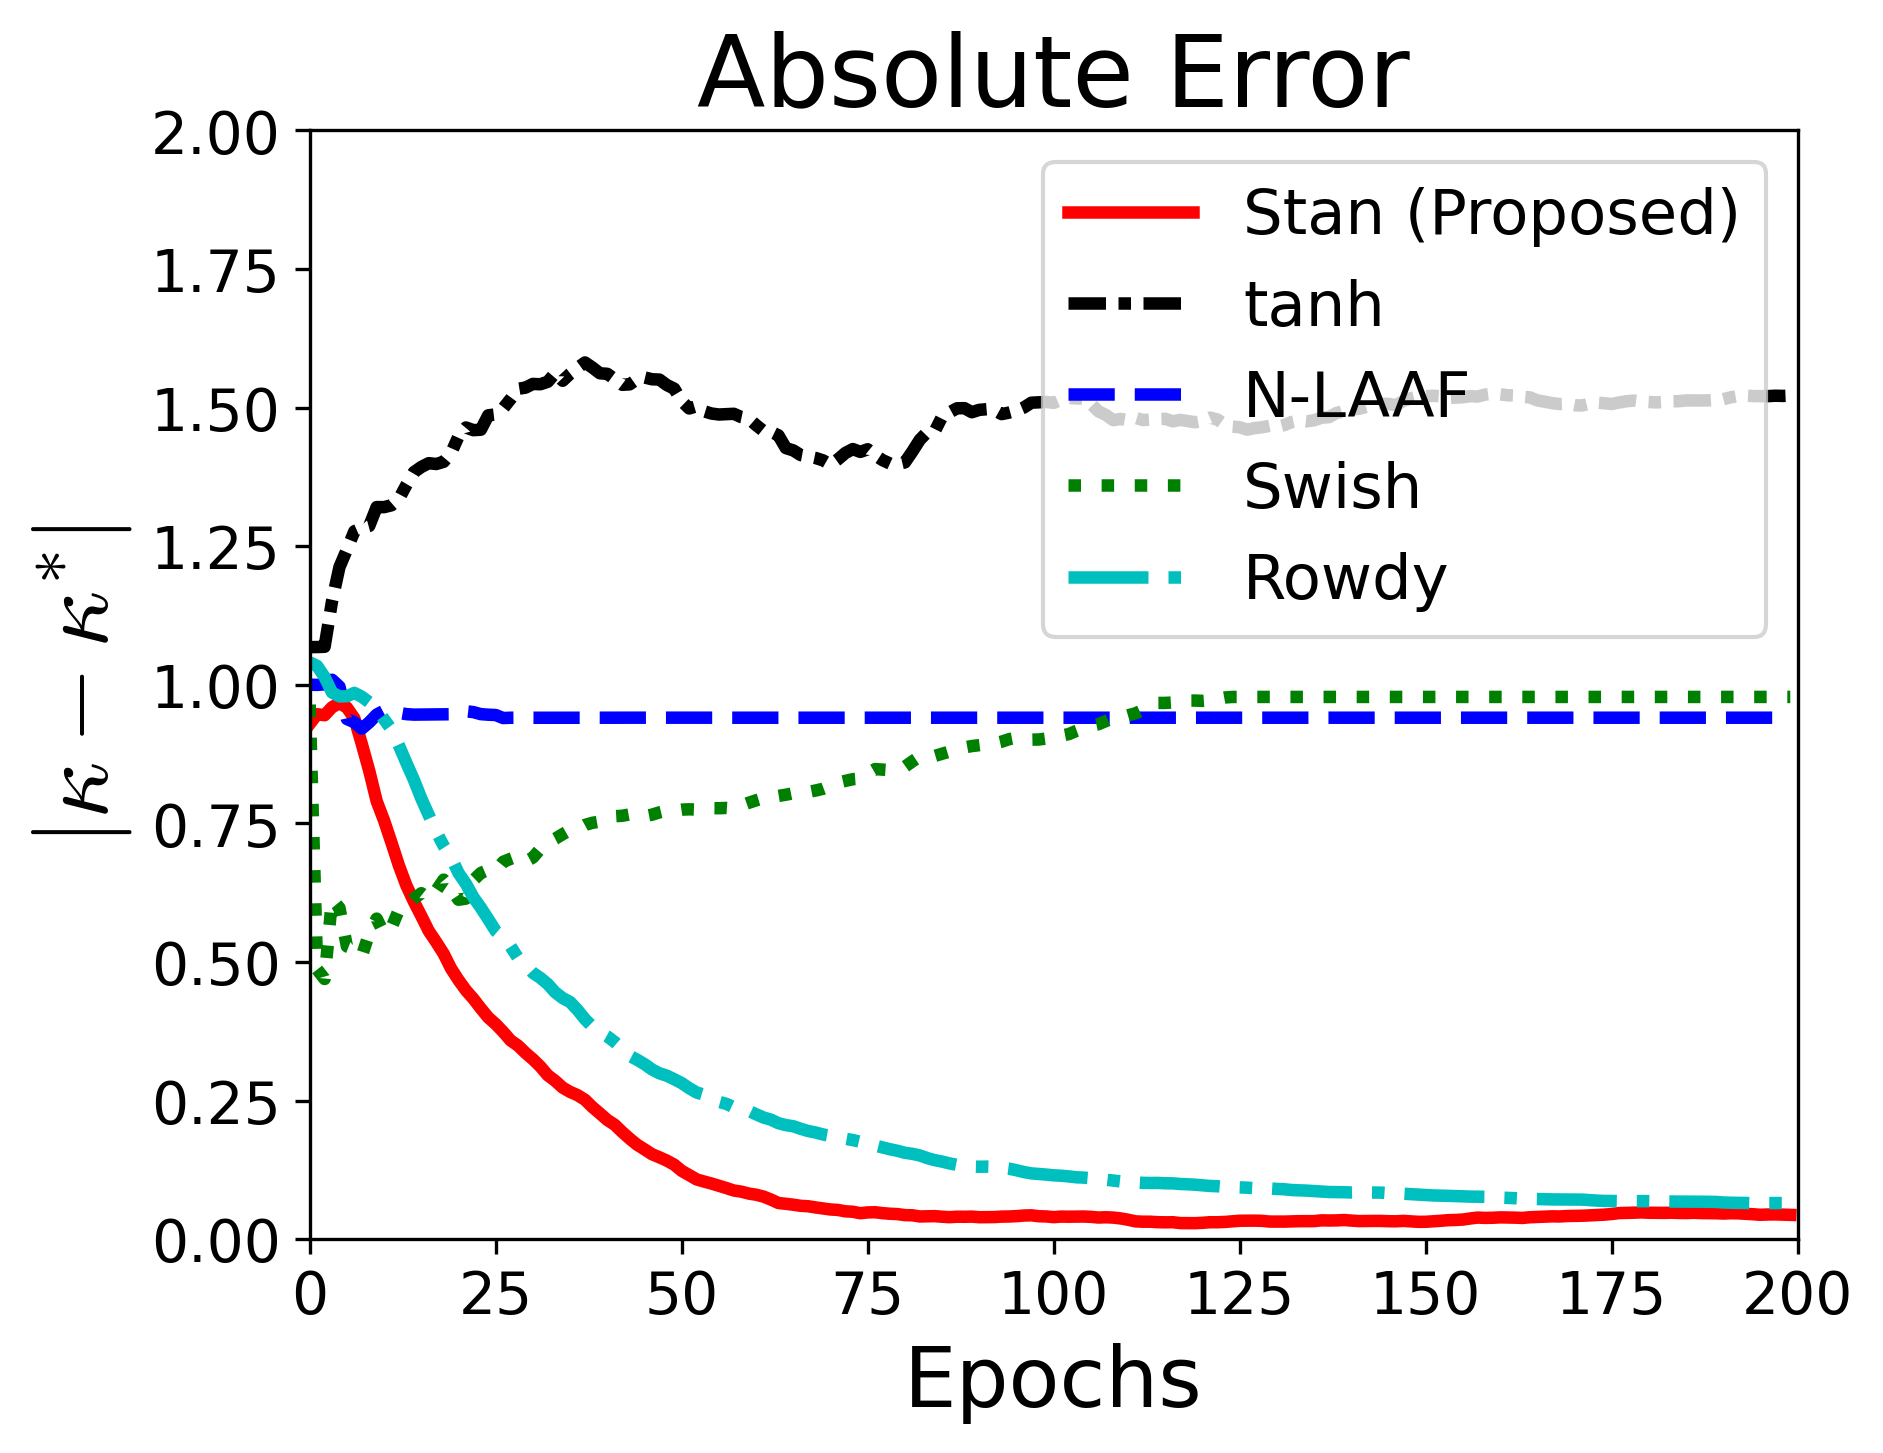

In [11]:
prob_folder = './Inverse/HT/'
prob_name= 'inv_HT_'

activs = ["stan","tanh","atanh","swish","rowdy"]
files = ["stan","tanh","atanh","swish","rowdy"]
linetypes = ['r','k','b--','g:','c-.']
labels = ['Stan (Proposed)','tanh','N-LAAF','Swish','Rowdy']

actual_lambda = 1

fig, ax = plt.subplots()
fig.dpi = 300

for t in range(5):
    data = scipy.io.loadmat(prob_folder + activs[t] + '/' + prob_name + files[t] + '.mat')
    lambda1=  data['lambda1']
    lambda1 = np.mean(lambda1,axis=0)
    print(lambda1[-1])
    
    if t==1:
        ax.plot(np.abs(lambda1 - actual_lambda),linetypes[t],linewidth = 3,label = labels[t],linestyle = (0, (3, 1, 1, 1)))
    else:
        ax.plot(np.abs(lambda1 - actual_lambda),linetypes[t],linewidth = 3,label = labels[t])
            

ax.set_xlim([0,200])
ax.set_ylim([0,2])
ax.legend(prop={'size':15})
ax.set_title('Absolute Error', fontsize=24, math_fontfamily='cm')
ax.set_xlabel('Epochs', fontsize=20, math_fontfamily='cm')
ax.set_ylabel('$|\\kappa - \\kappa^{*}|$',fontsize=24, math_fontfamily='cm')
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
#plt.savefig('Inv_HT_lambda_history.pdf', format='pdf',pad_inches=0, bbox_inches='tight')
plt.savefig('Inv_HT_lambda_history.svg', format='svg',pad_inches=0, bbox_inches='tight',transparent = True)

In [5]:
prob_folders = ['./2D/Maxwell/','./3D/','./Inverse/HT/']

num_steps = [200,100,200]

prob_names= ['ES_','3D_HTTP_','inv_HT_']

activs = ["stan","tanh","atanh","swish","rowdy"]
files = ["stan","tanh","atanh","swish","rowdy"]
linetypes = ['r','k','b--','g:','c-.']
labels = ['Stan (Proposed)','tanh','N-LAAF','Swish','Rowdy']


for s in range(2,3):

    for t in range(5):
        data = scipy.io.loadmat(prob_folders[s] + activs[t] + '/' + prob_names[s] + files[t] + '.mat')
        test_loss =  data['test_mse_loss']

        mean_test_loss = np.zeros((num_steps[s],1))

        for i in range(10):
            mean_test_loss = mean_test_loss + test_loss[i,:num_steps[s]].reshape(-1,1)

        mean_test_loss = mean_test_loss/10

        print(prob_names[s]," ",labels[t]," MSE: ",mean_test_loss[-1])

        test_loss =  data['test_re_loss']

        mean_test_loss = np.zeros((num_steps[s],1))

        for i in range(10):
            mean_test_loss = mean_test_loss + test_loss[i,:num_steps[s]].reshape(-1,1)

        mean_test_loss = mean_test_loss/10

        print(prob_names[s]," ",labels[t]," RE: ",mean_test_loss[-1])


inv_HT_   Stan (Proposed)  MSE:  [27.93084599]
inv_HT_   Stan (Proposed)  RE:  [0.08895386]
inv_HT_   tanh  MSE:  [649.14542993]
inv_HT_   tanh  RE:  [0.40718861]
inv_HT_   N-LAAF  MSE:  [471.88949952]
inv_HT_   N-LAAF  RE:  [0.35719778]
inv_HT_   Swish  MSE:  [201.753154]
inv_HT_   Swish  RE:  [0.18062686]
inv_HT_   Rowdy  MSE:  [31.83185504]
inv_HT_   Rowdy  RE:  [0.09493125]
